# Análise dos dados do IDEB 


DISCLAIMER: THIS IS STILL WORK IN PROGRESS

Em pleno ano eleitoral diversos candidatos aos governos estaduais e presidência da república tratram do tema Educação. É comum que candidatos usem um indicador como o IDEB para avaliar seus próprios desempenhos e de oponentes ao mesmo tempo em que propostas para melhorar esse indicador são veículadas, como construção de novas escolas, contratação de professores, etc. 
Nossa opinião é que num país de terceiro mundo como o Brasil mesmo outros fatores não diretamente ligados a educação, como violência ou renda possuem uma relação com o desempenho do IDEB; neste notebook buscamos mensurar o impacto que fatores socio-econômicos desempenham nos resultados do IDEB estadual.


Para tal usaremos as seguintes fontes públicas:

* [Taxa de homicídio por unidade da federação - dados de 2012 a 2015](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_taxa_de_homic%C3%ADdios)
* [Taxa de extrema pobreza por unidade da federação - dados de 2010](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_incid%C3%AAncia_da_pobreza)
* [Renda per capita por unidade da federação - dados de 2017](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_renda_per_capita)
* [IDEB das Escolas Públicas (Anos Iniciais e Anos Finais) 2015](https://www.qedu.org.br/brasil/ideb/ideb-por-estados)

Idealmente deveríamos trabalhar com dados de todos os fatores como sendo do mesmo período (ano de 2015) e essa é uma melhoria que pretendemos realizar no futuro.

Análise dos dados do IDEB 
======================

* O que é o IDEB e como é calculado
* Que questões queremos responder?
* Adicionar mapa com estados
* Análise 1:
* Análise 2:

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import scikits.bootstrap as bootstrap
import matplotlib.pyplot as plt
import warnings
import patsy
import folium
from statsmodels.formula.api import ols, rlm

%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

## Carrega dados

In [2]:
df = pd.read_csv('IDEB.csv', sep=';', encoding='ansi')
df

,Ano,UF,ESTADO,IDEB_AI,IDEB_AF,PE_MA2,PE_MA4,TH_MA2,TH_MA4
0,2017,AC,Acre,5.7,4.6,29.125,24.2375,54.15,41.175
1,2017,AL,Alagoas,4.9,3.9,24.675,23.3125,55.55,56.550
2,2017,AP,Amapá,4.4,3.5,22.225,16.1625,51.30,43.725
3,2017,AM,Amazonas,5.3,4.4,29.275,23.2875,33.80,34.250
4,2017,BA,Bahia,4.7,3.4,23.950,20.4000,46.00,42.875
5,2017,CE,Ceará,6.1,4.9,23.675,21.5625,49.85,49.675
6,2017,DF,Distrito Federal,6.0,4.3,5.500,4.4000,21.85,24.700
7,2017,ES,Espírito Santo,5.7,4.4,9.825,7.9625,34.70,36.925
8,2017,GO,Goiás,5.9,5.1,6.950,5.6000,42.30,43.550
9,2017,MA,Maranhão,4.5,3.7,31.250,28.5750,32.00,33.800


## Análise Exploratória

### Estatísticas descritivas

In [3]:
df.describe()

,Ano,IDEB_AI,IDEB_AF,PE_MA2,PE_MA4,TH_MA2,TH_MA4
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2012.000000,4.661111,3.779012,13.741821,13.742978,32.315432,31.386574
std,3.426241,0.827347,0.556769,8.166125,8.036941,12.165066,11.615080
min,2007.000000,3.000000,2.600000,2.100000,2.300000,10.800000,10.875000
25%,2009.000000,4.000000,3.400000,5.725000,5.756250,23.312500,22.387500
50%,2012.000000,4.650000,3.800000,14.150000,14.143750,32.050000,31.050000
75%,2015.000000,5.300000,4.175000,19.993750,19.875000,39.300000,37.756250
max,2017.000000,6.500000,5.100000,31.950000,32.375000,69.150000,67.000000


#### Diferença entre as médias dos anos finais e iniciais no conjunto de dados

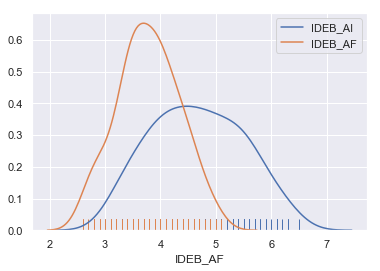

In [4]:
plt.figure()
sns.distplot(df["IDEB_AI"], hist=False, rug=True, label="IDEB_AI")
sns.distplot(df["IDEB_AF"], hist=False, rug=True, label="IDEB_AF")

Como vimos nas estatísticas descritivas a média dos dados do IDEB Anos Iniciais (IDEB AI) são superiores que a média do IDEB Anos Finais (IDEB AF), respectivamente 5.11 e 4.00. Porém *a diferença entre essas médias é estatisticamente signifcante?* Vamos calcular um intervalo de confiança de 95% para essas médias e exibir o resultado: 

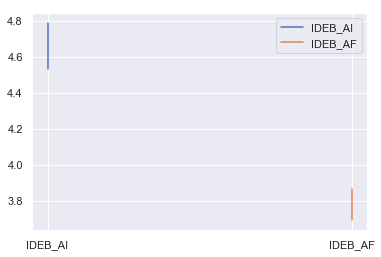

In [5]:
ci_mean_ideb_ai = bootstrap.ci(data=df["IDEB_AI"], alpha=0.05)  
ci_mean_ideb_af = bootstrap.ci(data=df["IDEB_AF"], alpha=0.05)

fig, ax = plt.subplots()
ax.plot(["IDEB_AI", "IDEB_AI"], ci_mean_ideb_ai, label="IDEB_AI")
ax.plot(["IDEB_AF", "IDEB_AF"], ci_mean_ideb_af, label="IDEB_AF")
ax.legend()

plt.show()

A falta de intersecção nos intervalos acima mostra que para o intervalo de confiança escolhido (95%) a diferença entre as médias é estatisticamente significante. 

#### IDEB Anos Iniciais - Distribuição por ano 

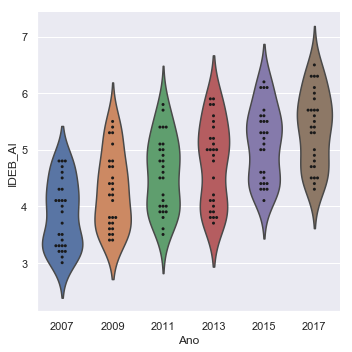

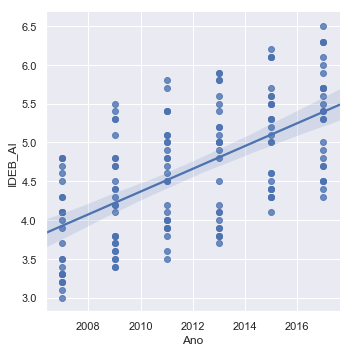

In [6]:
g = sns.catplot(y='IDEB_AI', x='Ano', kind='violin', inner=None, data=df)
sns.swarmplot(y='IDEB_AI', x='Ano', color='k', size=3, data=df, ax=g.ax)
sns.lmplot(data=df, y='IDEB_AI', x='Ano')


#### IDEB Anos Iniciais - Distribuição por estado em 2017

In [7]:
#https://github.com/python-visualization/folium/tree/master/examples/data

for t in ("AI", "AF"):
    for year in range(2007, 2018, 2):
        m = folium.Map(location=[-16, -55], zoom_start=4, tiles='cartodbpositron')
        state_data = df[df['Ano']==year][["UF", "IDEB_"+t]]
        m.choropleth(
            geo_data=open('uf.json', encoding="latin-1").read(),
            name='choropleth',
            data=state_data,
            columns=['UF', 'IDEB_'+t],
            key_on='feature.id',
            fill_color='YlGn',
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='IDEB {} ({})'.format(t, year)
        )
        folium.LayerControl().add_to(m)
        m.save(outfile="UF_{}_{}.html".format(t, year))


In [8]:
from IPython.display import IFrame
IFrame(src='uf_AI_2017.html', width=500, height=600)

In [9]:
df['IDEB_AI_STD'] = 0.0
df['IDEB_AF_STD'] = 0.0
df['PE_MA2_STD'] = 0.0
df['TH_MA2_STD'] = 0.0

In [10]:
for year in range(2007, 2018, 2):
    ideb_ai_year = df[df['Ano']==year]['IDEB_AI']
    ideb_af_year = df[df['Ano']==year]['IDEB_AF']
    pe_ma2_year  = df[df['Ano']==year]['PE_MA2']
    th_ma2_year  = df[df['Ano']==year]['TH_MA2']
    pe_ma4_year  = df[df['Ano']==year]['PE_MA4']
    th_ma4_year  = df[df['Ano']==year]['TH_MA4']
    df.loc[df['Ano']==year, 'IDEB_AI_STD'] = (ideb_ai_year - ideb_ai_year.mean()) / ideb_ai_year.std()
    df.loc[df['Ano']==year, 'IDEB_AF_STD'] = (ideb_af_year - ideb_af_year.mean()) / ideb_af_year.std()
    df.loc[df['Ano']==year, 'PE_MA2_STD']  = (pe_ma2_year  - pe_ma2_year.mean() ) / pe_ma2_year.std()
    df.loc[df['Ano']==year, 'TH_MA2_STD']  = (th_ma2_year  - th_ma2_year.mean() ) / th_ma2_year.std()
    df.loc[df['Ano']==year, 'PE_MA4_STD']  = (pe_ma4_year  - pe_ma4_year.mean() ) / pe_ma4_year.std()
    df.loc[df['Ano']==year, 'TH_MA4_STD']  = (th_ma4_year  - th_ma4_year.mean() ) / th_ma4_year.std()
    
df.tail()

,Ano,UF,ESTADO,IDEB_AI,IDEB_AF,PE_MA2,PE_MA4,TH_MA2,TH_MA4,IDEB_AI_STD,IDEB_AF_STD,PE_MA2_STD,TH_MA2_STD,PE_MA4_STD,TH_MA4_STD
157,2007,RR,Roraima,4.1,3.5,15.25,20.100,27.70,25.575,0.408135,0.292109,-0.051595,0.012938,0.459939,-0.106998
158,2007,SC,Santa Catarina,4.7,4.1,2.55,2.725,10.80,10.875,1.409920,1.683923,-1.450158,-1.426934,-1.447410,-1.420758
159,2007,SE,Sergipe,3.2,2.8,19.90,19.800,27.45,26.000,-1.094543,-1.331674,0.460478,-0.008362,0.427006,-0.069015
160,2007,SP,São Paulo,4.8,4.0,4.10,4.325,17.90,21.575,1.576884,1.451954,-1.279467,-0.822017,-1.271769,-0.464483
161,2007,TO,Tocantins,4.0,3.6,18.05,17.325,16.90,16.200,0.241171,0.524078,0.256750,-0.907217,0.155312,-0.944855


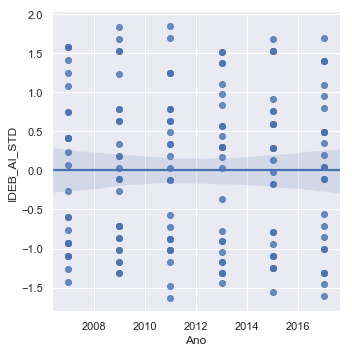

In [11]:
sns.lmplot(data=df, y='IDEB_AI_STD', x='Ano')


#### IDEB Anos Finais - Distribuição por ano

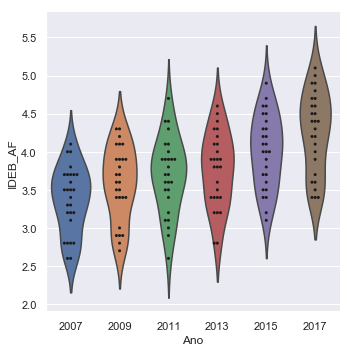

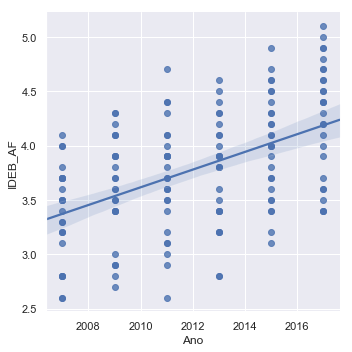

In [12]:
g = sns.catplot(y='IDEB_AF', x='Ano', kind='violin', inner=None, data=df)
sns.swarmplot(y='IDEB_AF', x='Ano', color='k', size=3, data=df, ax=g.ax)
sns.lmplot(data=df, y='IDEB_AF', x='Ano')

In [13]:
from IPython.display import IFrame
IFrame(src='UF_AF_2017.html', width=500, height=600)

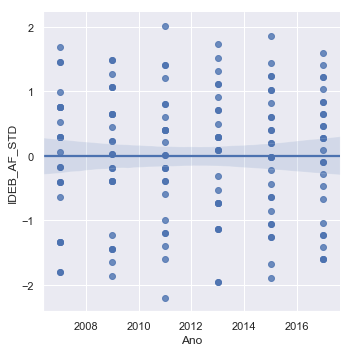

In [14]:
sns.lmplot(data=df, y='IDEB_AF_STD', x='Ano')

Nota-se que em tanto nos Anos Iniciais como nos Anos Finais existe um _trend_ de crescimento da mediana das notas a cada ano, bem como uma progressiva expansão do range de distribuição de notas bem como uma ligeira migração da densidade para cima.

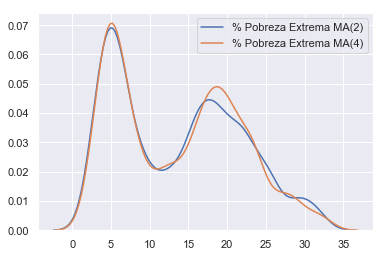

In [15]:
plt.figure()
sns.kdeplot(df["PE_MA2"], bw=1.5, label="% Pobreza Extrema MA(2)")
sns.kdeplot(df["PE_MA4"], bw=1.5, label="% Pobreza Extrema MA(4)")

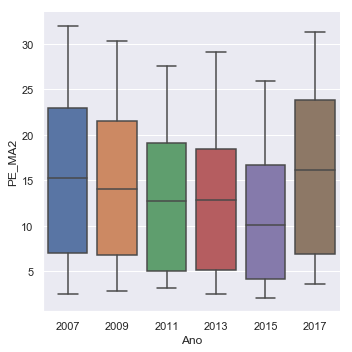

In [16]:
sns.catplot(y='PE_MA2', x='Ano', kind='box', data=df)

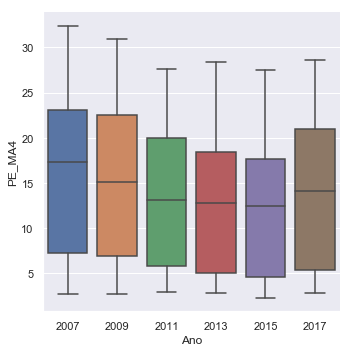

In [17]:
sns.catplot(y='PE_MA4', x='Ano', kind='box', data=df)

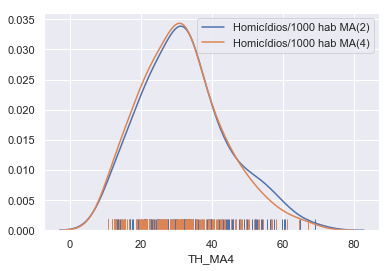

In [18]:
plt.figure()
sns.distplot(df["TH_MA2"], hist=False, rug=True, label="Homicídios/1000 hab MA(2)")
sns.distplot(df["TH_MA4"], hist=False, rug=True, label="Homicídios/1000 hab MA(4)")

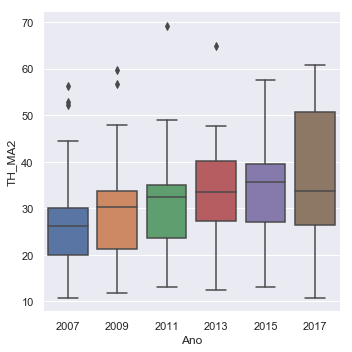

In [19]:
sns.catplot(y='TH_MA2', x='Ano', kind='box', data=df)

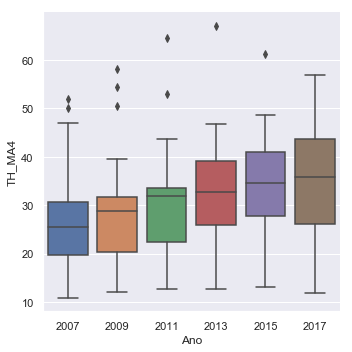

In [20]:
sns.catplot(y='TH_MA4', x='Ano', kind='box', data=df)

# Busca de associações entre IDEB e as variáveis sócio-econômicas

### IDEB Anos Iniciais (IDEB_AI)

<Figure size 432x288 with 0 Axes>

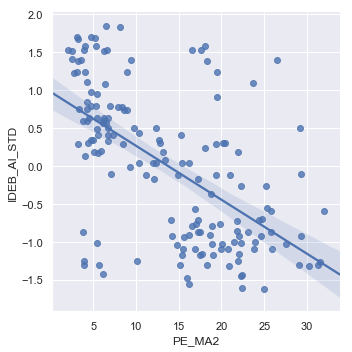

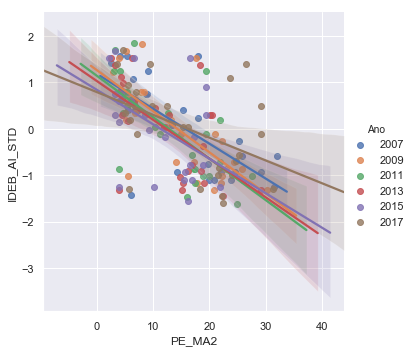

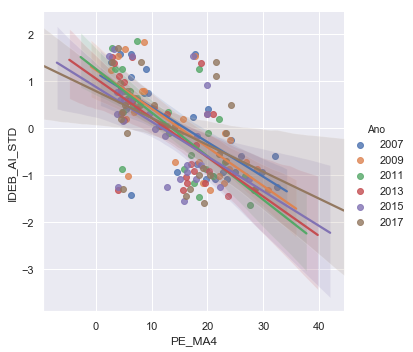

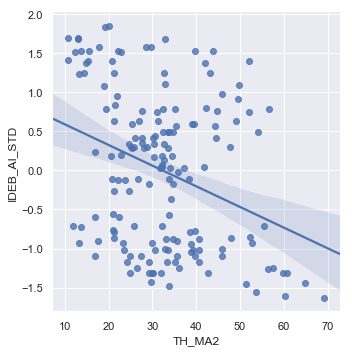

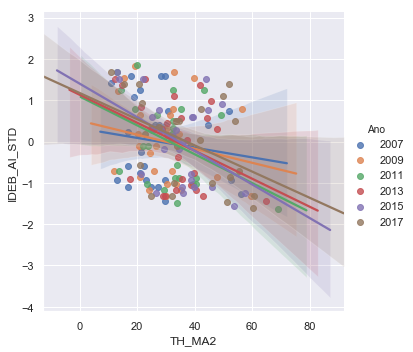

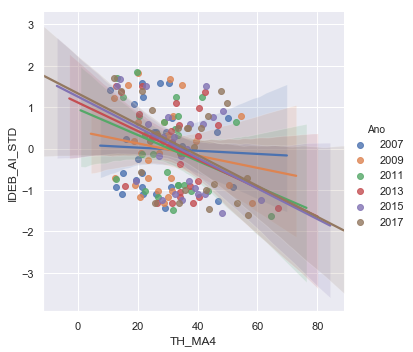

In [21]:
plt.figure()
sns.lmplot(data=df, x="PE_MA2", y="IDEB_AI_STD")
sns.lmplot(data=df, x="PE_MA2", y="IDEB_AI_STD", hue="Ano")
sns.lmplot(data=df, x="PE_MA4", y="IDEB_AI_STD", hue="Ano")
sns.lmplot(data=df, x="TH_MA2", y="IDEB_AI_STD")
sns.lmplot(data=df, x="TH_MA2", y="IDEB_AI_STD", hue="Ano")
sns.lmplot(data=df, x="TH_MA4", y="IDEB_AI_STD", hue="Ano")

In [22]:
formula = "IDEB_AI ~ TH_MA2 * PE_MA2"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDEB_AI   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     21.68
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           8.21e-12
Time:                        00:19:53   Log-Likelihood:                -170.74
No. Observations:                 162   AIC:                             349.5
Df Residuals:                     158   BIC:                             361.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9981      0.300     19.972      0.000       5.405       6.591
TH_MA2           -0.0219      0.010     -2.199      0.029      -0.042      -0.002
PE_MA2           -0.0989      0.017     -5.790      0.000      -0.133      -0.065
TH_MA2:PE_MA2     0.0015      0.001      2.995      0.003       0.001       0.003
==============================================================================
Omnibus:                        0.732   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.694   Jarque-Bera (JB):                0.748
Skew:                           0.159   Prob(JB):                        0.688
Kurtosis:                       2.901   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
formula = "IDEB_AI_STD ~ TH_MA2 * PE_MA2"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IDEB_AI_STD   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     34.50
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           3.32e-17
Time:                        00:19:53   Log-Likelihood:                -186.00
No. Observations:                 162   AIC:                             380.0
Df Residuals:                     158   BIC:                             392.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9995      0.330      6.059      0.000       1.348       2.651
TH_MA2           -0.0367      0.011     -3.353      0.001      -0.058      -0.015
PE_MA2           -0.1087      0.019     -5.790      0.000      -0.146      -0.072
TH_MA2:PE_MA2     0.0014      0.001      2.538      0.012       0.000       0.003
==============================================================================
Omnibus:                        4.309   Durbin-Watson:                   2.236
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                4.534
Skew:                           0.206   Prob(JB):                        0.104
Kurtosis:                       3.709   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
formula = "IDEB_AI_STD ~ TH_MA2_STD * PE_MA2_STD"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IDEB_AI_STD   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     35.21
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           1.76e-17
Time:                        00:19:53   Log-Likelihood:                -185.35
No. Observations:                 162   AIC:                             378.7
Df Residuals:                     158   BIC:                             391.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0305      0.063     -0.484      0.629      -0.155       0.094
TH_MA2_STD               -0.1671      0.067     -2.478      0.014      -0.300      -0.034
PE_MA2_STD               -0.5490      0.066     -8.308      0.000      -0.680      -0.418
TH_MA2_STD:PE_MA2_STD     0.0913      0.055      1.665      0.098      -0.017       0.200
==============================================================================
Omnibus:                        5.587   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                6.910
Skew:                           0.205   Prob(JB):                       0.0316
Kurtosis:                       3.925   Cond. No.                         1.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

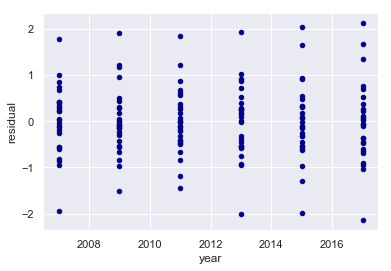

In [25]:
resids = {'year':[]}
l = []
for year in range(2007, 2018, 2):
    l.append(model.resid.values[df["Ano"]==year].tolist())
    for i in range(len(l[0])):
        resids['year'].append(year)
resids['residual'] = [item for sublist in l for item in sublist] 
df_resids = pd.DataFrame.from_dict(resids)
df_resids.plot.scatter(x='year', y='residual', c='DarkBlue')

## MA4 ##

In [26]:
formula = "IDEB_AI ~ TH_MA4 * PE_MA4"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                IDEB_AI   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     27.12
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           3.33e-14
Time:                        00:19:53   Log-Likelihood:                -165.01
No. Observations:                 162   AIC:                             338.0
Df Residuals:                     158   BIC:                             350.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.8949      0.294     20.059      0.000       5.314       6.475
TH_MA4           -0.0154      0.010     -1.566      0.119      -0.035       0.004
PE_MA4           -0.0927      0.016     -5.662      0.000      -0.125      -0.060
TH_MA4:PE_MA4     0.0012      0.001      2.255      0.026       0.000       0.002
==============================================================================
Omnibus:                        1.196   Durbin-Watson:                   1.465
Prob(Omnibus):                  0.550   Jarque-Bera (JB):                0.854
Skew:                           0.155   Prob(JB):                        0.653
Kurtosis:                       3.174   Cond. No.                     3.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
formula = "IDEB_AI_STD ~ TH_MA4 * PE_MA4"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IDEB_AI_STD   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     36.51
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           5.54e-18
Time:                        00:19:53   Log-Likelihood:                -184.15
No. Observations:                 162   AIC:                             376.3
Df Residuals:                     158   BIC:                             388.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.9054      0.331      5.761      0.000       1.252       2.559
TH_MA4           -0.0318      0.011     -2.878      0.005      -0.054      -0.010
PE_MA4           -0.1014      0.018     -5.503      0.000      -0.138      -0.065
TH_MA4:PE_MA4     0.0011      0.001      1.863      0.064   -6.49e-05       0.002
==============================================================================
Omnibus:                        4.422   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                5.069
Skew:                           0.165   Prob(JB):                       0.0793
Kurtosis:                       3.801   Cond. No.                     3.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
formula = "IDEB_AI_STD ~ TH_MA4_STD * PE_MA4_STD"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IDEB_AI_STD   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     36.14
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           7.71e-18
Time:                        00:19:53   Log-Likelihood:                -184.49
No. Observations:                 162   AIC:                             377.0
Df Residuals:                     158   BIC:                             389.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.0221      0.062     -0.357      0.722      -0.144       0.100
TH_MA4_STD               -0.1560      0.065     -2.382      0.018      -0.285      -0.027
PE_MA4_STD               -0.5704      0.064     -8.884      0.000      -0.697      -0.444
TH_MA4_STD:PE_MA4_STD     0.0800      0.053      1.509      0.133      -0.025       0.185
==============================================================================
Omnibus:                        5.126   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                6.389
Skew:                           0.169   Prob(JB):                       0.0410
Kurtosis:                       3.912   Cond. No.                         1.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

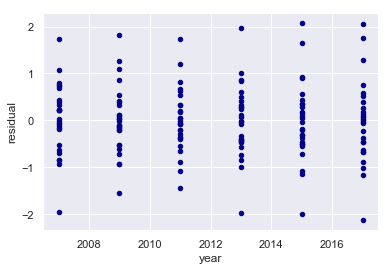

In [29]:
resids = {'year':[]}
l = []
for year in range(2007, 2018, 2):
    l.append(model.resid.values[df["Ano"]==year].tolist())
    for i in range(len(l[0])):
        resids['year'].append(year)
resids['residual'] = [item for sublist in l for item in sublist] 
df_resids = pd.DataFrame.from_dict(resids)
df_resids.plot.scatter(x='year', y='residual', c='DarkBlue')

### IDEB Anos Finais (IDEB_AF)

In [30]:
formula = "IDEB_AF_STD ~  TH_MA2 * PE_MA2"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IDEB_AF_STD   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     29.87
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           2.37e-15
Time:                        00:19:53   Log-Likelihood:                -190.42
No. Observations:                 162   AIC:                             388.8
Df Residuals:                     158   BIC:                             401.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.7100      0.339      5.042      0.000       1.040       2.380
TH_MA2           -0.0314      0.011     -2.796      0.006      -0.054      -0.009
PE_MA2           -0.0656      0.019     -3.402      0.001      -0.104      -0.028
TH_MA2:PE_MA2     0.0004      0.001      0.755      0.452      -0.001       0.002
==============================================================================
Omnibus:                        2.326   Durbin-Watson:                   2.398
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                2.382
Skew:                           0.276   Prob(JB):                        0.304
Kurtosis:                       2.783   Cond. No.                     3.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
formula = "IDEB_AF_STD ~  TH_MA4_STD * PE_MA4_STD"
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            IDEB_AF_STD   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     33.03
Date:                Sat, 22 Sep 2018   Prob (F-statistic):           1.25e-16
Time:                        00:19:53   Log-Likelihood:                -187.38
No. Observations:                 162   AIC:                             382.8
Df Residuals:                     158   BIC:                             395.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0073      0.063      0.116      0.908      -0.117       0.132
TH_MA4_STD               -0.2838      0.067     -4.258      0.000      -0.415      -0.152
PE_MA4_STD               -0.4735      0.065     -7.244      0.000      -0.603      -0.344
TH_MA4_STD:PE_MA4_STD    -0.0265      0.054     -0.492      0.623      -0.133       0.080
==============================================================================
Omnibus:                        0.897   Durbin-Watson:                   2.416
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                1.004
Skew:                           0.162   Prob(JB):                        0.605
Kurtosis:                       2.792   Cond. No.                         1.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Abordagem bayesiana

In [32]:
from pymc3 import *

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [39]:
with Model() as unpooled_model:
    # Priors
    #sigma = HalfCauchy('sigma', beta=10., testval=1.)
    #intercept = Normal('Intercept', 0., sd=20.)
    #beta_pe = Normal('beta_pe', 0., sd=20.)
    #beta_th = Normal('beta_th', 0., sd=20.)
    #beta_peth = Normal('beta_peth', 0., sd=30.)

    # Model
    #ideb = intercept +  beta_pe * df.PE_MA2_STD.values  +  beta_th * df.TH_MA2_STD.values + beta_peth * df.TH_MA2_STD.values * df.PE_MA2_STD.values
    
    # Likelihood
    #likelihood = Normal('y', mu=ideb, sd=sigma, observed=df.IDEB_AI_STD)
    
    GLM.from_formula("IDEB_AF_STD ~  TH_MA2_STD * PE_MA2_STD", df)
    
    # Inference
    trace = sample(1000, tune=500, cores=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [sd, TH_MA2_STD:PE_MA2_STD, PE_MA2_STD, TH_MA2_STD, Intercept]
Sampling 3 chains: 100%|████████████████████████████████████████████████████████| 4500/4500 [02:26<00:00, 30.73draws/s]


In [63]:
plt.figure(figsize=(7,7))
traceplot(trace,
         lines={k: v['mean'] for k, v in pm.summary(traces[-1000:]).iterrows()})
plt.tight_layout()

NameError: name 'pm' is not defined

<Figure size 504x504 with 0 Axes>

In [61]:
years = sorted(df.Ano.unique())
year_idx = df.Ano.values - 2007
year_idx = list(map(lambda x: x//2, year_idx))
n_years = len(years)
#print(n_years, year_idx)

with Model() as hmodel:
    # Hyper-Priors
    sigma_intercept = HalfCauchy('sigma_intercept', 2.)
    sigma_pe = HalfCauchy('sigma_pe', 2.)
    sigma_th = HalfCauchy('sigma_th', 2.)
    sigma_peth = HalfCauchy('sigma_peth', 2.)
    
    mu_intercept = Normal('mu_intercept', mu=0., sd=4)
    mu_pe = Normal('mu_pe', mu=-0.3, sd=2)
    mu_th = Normal('mu_th', mu=-0.5, sd=2)
    mu_peth = Normal('mu_peth', mu=-0.2, sd=2)
    
    # Priors
    intercept = Normal('intercept', mu=mu_intercept, sd=sigma_intercept, shape=n_years)
    beta_pe = Normal('beta_pe', mu=mu_pe, sd=sigma_pe, shape=n_years)
    beta_th = Normal('beta_th', mu=mu_th, sd=sigma_th, shape=n_years)
    beta_peth = Normal('beta_peth', mu=mu_peth, sd=sigma_peth, shape=n_years)

    eps = HalfCauchy('eps', 2.)
    # Model
    ideb = intercept[year_idx] +  beta_pe[year_idx] * df.PE_MA2_STD.values  +  beta_th[year_idx] * df.TH_MA2_STD.values + beta_peth[year_idx] * df.TH_MA2_STD.values * df.PE_MA2_STD.values
    
    # Likelihood
    likelihood = Normal('y', mu=ideb, sd=eps, observed=df.IDEB_AI_STD)
    
    
    
    # Inference
    trace = sample(500, tune=200, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [eps, beta_peth, beta_th, beta_pe, intercept, mu_peth, mu_th, mu_pe, mu_intercept, sigma_peth, sigma_th, sigma_pe, sigma_intercept]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 1400/1400 [34:18<00:00,  6.26draws/s]
There were 162 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5572116887634, but should be close to 0.8. Try to increase the number of tuning steps.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


<Figure size 504x504 with 0 Axes>

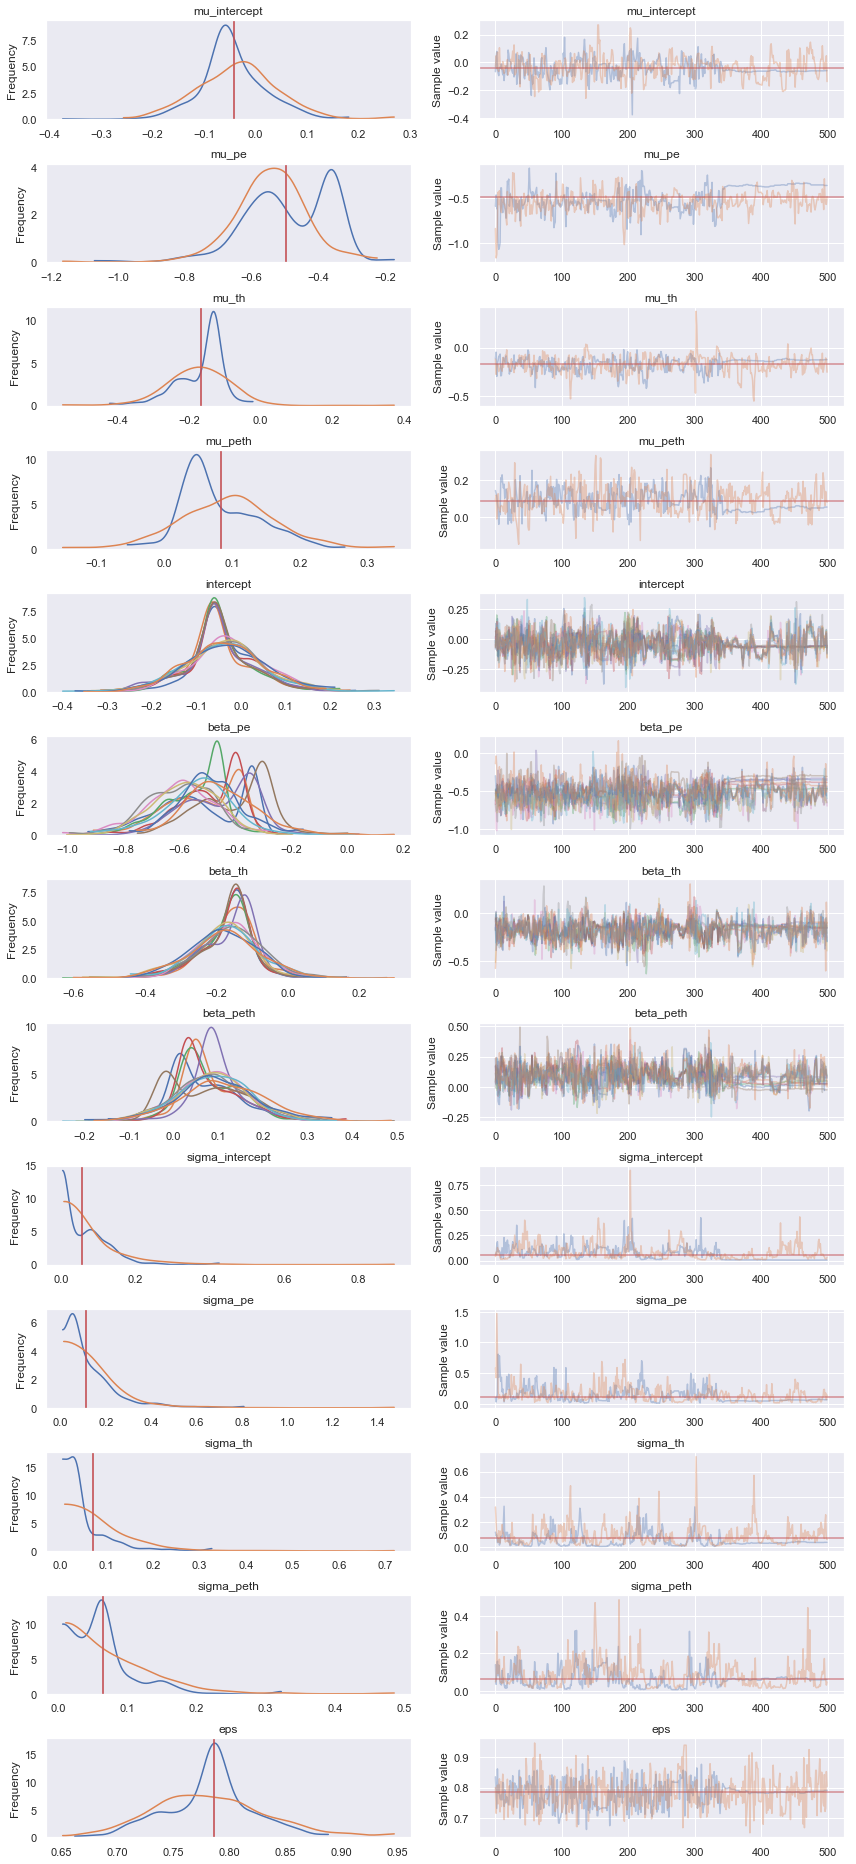

In [66]:
plt.figure(figsize=(7,7))
traceplot(trace,
          lines={k: v['mean'] for k, v in summary(trace[-300:]).iterrows()})
plt.tight_layout()

## Conclusão

A análise realizada aqui nos fornece evidências que o impacto de fatores sócio-econômicos possuem num indicador como o IDEB dentro das unidades da federação Brasileira. Esses impactos podem ser até mesmo maiores que os fatores diretamente ligados a educação, principalmente nos anos iniciais.